## ROI analysis for 
10 at 45, 10 at 46 and 11 at 47
#### Parameters
#### parameters
number of electrolysers:1 and 16.  number of canisters: 1-150
###### The results from this analysis can be found at 
'ROIResults/Analysis[2].csv'

In [1]:
'''
import general python libraries
'''
import StationV5 as Station
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
import project specific libraries
'''
import Prices

In [3]:
station1 = Station.Station()

In [4]:
dispenser_time_demand = [45,45,45,45,45,45,45,45,45,45,46,46,46,46,46,46,46,46,46,46,47,47,47,47,47,47,47,47,47,47,47]
ROI_array = np.zeros([3,150])

'''
-------------------------------------------------------------------------------------------------------
'''
for i in range(len(ROI_array)):
    for j in range(len(ROI_array[0])):
        
        if i ==0:
            n_electrolysers = 1
        if i==1:
            n_electrolysers = 2
        if i==2:
            n_electrolysers = 16
            
        n_canisters = j+1

        electrolyser_capacity = n_electrolysers * 22.125
        storage_capacity = n_canisters * 9.5



        total_cost = np.zeros(365)
        unsatisfaction = np.zeros(365)

        '''
        -------------------------------------------------------------------------------------------------------
        '''
        for n in range(365):
            day = n+1

            starting_storage_level = 0
            elec_price = Prices.elec_prices_data(day)

            demand, level, unsatisfied = station1.get_optimised_electrolyser_demand(elec_price, dispenser_time_demand, starting_storage_level,electrolyser_capacity,storage_capacity)

            # convert from demand in kg to kWh
            demand = demand*49.465
            # convert electricity prices into pounds
            elec_price = elec_price/100
            # find the cost of the refill
            cost = np.dot(demand,elec_price)

            total_cost[day-1] = cost
            unsatisfaction[day-1] = unsatisfied
            
            if unsatisfied >= 1:
                break

        avg_refill_cost = (np.average(total_cost))/(len(dispenser_time_demand))
        if np.sum(unsatisfaction) > 0:
            feasible = 0
        else:
            feasible = 1
        '''
        --------------------------------------------------------------------------------------------------------
        '''

        capital_cost = n_electrolysers*3200000 + n_canisters*5000
        yearly_return = (169.36-avg_refill_cost)*len(dispenser_time_demand)*365

        if feasible == 1:
            ROI = (yearly_return/capital_cost)*100
        else: 
            ROI = 0

        
        ROI_array[i][j] = ROI
        
        print(i,j)
        '''
        -------------------------------------------------------------------------------------------------------
        '''


0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43


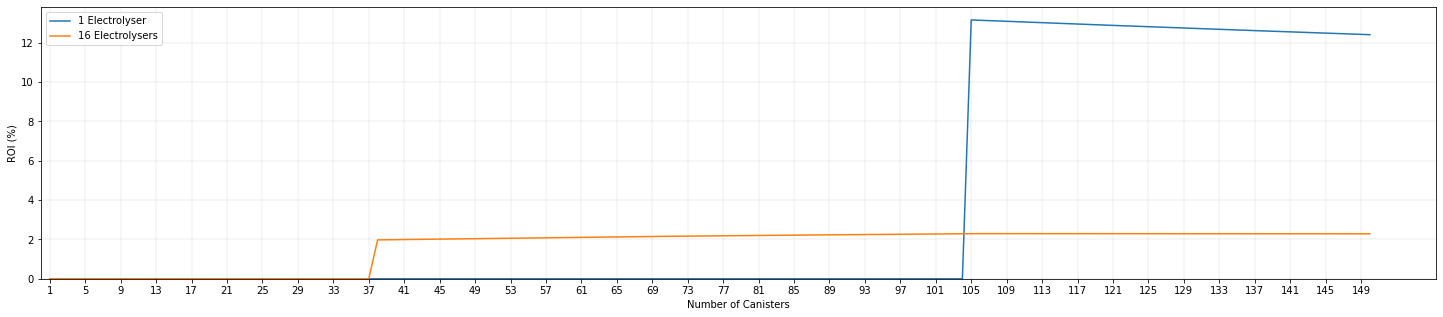

In [15]:
n = [n for n in range(1,len(ROI_array[0])+1)]

fig, ax = plt.subplots(figsize=[25,5])

my_xticks = [n for n in range(1,len(ROI_array[0]),4)]
my_xtick_labels = [n for n in range(1,len(ROI_array[0]),4)]
ax.set_xticks(my_xticks)
ax.set_xticklabels(my_xtick_labels)

ax.plot(n,ROI_array[0],label='1 Electrolyser')
# ax.plot(n,ROI_array[1],label='2 Electrolysers')
ax.plot(n,ROI_array[2],label='16 Electrolysers')

ax.set_ylabel('ROI (%)')
ax.set_xlim(0)
ax.set_ylim(0)
ax.set_xlabel('Number of Canisters')
ax.legend()
ax.grid(lw=0.2)

In [16]:
import pandas as pd

df = pd.DataFrame(ROI_array)

df.to_csv('ROIResults/Analysis[3].csv')